In [47]:
import vectorbt as vbt
import pandas as pd
import numpy as np
import quantstats as qs


In [48]:
# Download data for 10 stocks using vectorbt's built-in yfinance functionality
symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "JPM", "JNJ", "WMT"]

# Download the data using vectorbt's YFData
data = vbt.YFData.download(
    symbols,
    start="2020-01-01",
    end="2024-01-01",
    tz_convert="UTC",
    missing_index="drop",  # Drop missing data points
).get(
    "Close"
)  # Get only the closing prices
data.head()

symbol,AAPL,MSFT,GOOGL,AMZN,TSLA,META,NVDA,JPM,JNJ,WMT
Date,,,,,,,,,,
2019-12-31 05:00:00+00:00,71.000847,150.260040,66.570251,92.391998,27.888666,204.130127,5.856996,118.715469,124.898064,36.562607
2020-01-02 05:00:00+00:00,72.620850,153.042282,68.026024,94.900497,28.684000,208.635422,5.971747,120.154724,124.983673,36.593361
2020-01-03 05:00:00+00:00,71.914810,151.136673,67.670158,93.748497,29.534000,207.531479,5.876163,118.569099,123.536674,36.270321
2020-01-06 05:00:00+00:00,72.487854,151.527328,69.473846,95.143997,30.102667,211.440048,5.900806,118.474823,123.382584,36.196487
2020-01-07 05:00:00+00:00,72.146957,150.145721,69.339653,95.343002,31.270666,211.897522,5.972245,116.460678,124.136017,35.861134


In [72]:
# Define SMA periods
fast_period = 10
slow_period = 30

# Calculate SMAs for all stocks
fast_sma = vbt.MA.run(data, fast_period, short_name="fast")
slow_sma = vbt.MA.run(data, slow_period, short_name="slow")

# Calculate SMA difference (fast - slow)
sma_diff = fast_sma.ma - slow_sma.ma
sma_diff

fast_window                      10                                          \
symbol                         AAPL      AMZN     GOOGL       JNJ       JPM   
slow_window                      30        30        30        30        30   
Date                                                                          
2019-12-31 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-02 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-03 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-06 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-07 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2023-12-22 05:00:00+00:00  3.627438  3.409999  0.745197  2.110614  7.135066   
2023-12-26 05:00:00+00:00  3.394480  3.833665  1.267400  1.893872  7.324401   
2023-12-27 05:00:00+00:00  2.963303  4.061332  1.773364  1.701503  7.421148   
2023-12-28 05:00:00+00:00  2.325308  4.262666  2.315777  1.456055  7.608877   
2023-12-29 05:00:00+00:00  1.621792  4.423333  2.918165  1.153748  7.543841   

fast_window                                                                   
symbol                          META      MSFT      NVDA      TSLA       WMT  
slow_window                       30        30        30        30        30  
Date                                                                          
2019-12-31 05:00:00+00:00        NaN       NaN       NaN       NaN       NaN  
2020-01-02 05:00:00+00:00        NaN       NaN       NaN       NaN       NaN  
2020-01-03 05:00:00+00:00        NaN       NaN       NaN       NaN       NaN  
2020-01-06 05:00:00+00:00        NaN       NaN       NaN       NaN       NaN  
2020-01-07 05:00:00+00:00        NaN       NaN       NaN       NaN       NaN  
...                              ...       ...       ...       ...       ...  
2023-12-22 05:00:00+00:00   6.706536 -1.066516  0.332355  7.639333 -0.748266  
2023-12-26 05:00:00+00:00   8.781480 -0.923428  0.565842  7.927664 -0.478740  
2023-12-27 05:00:00+00:00  10.180140 -1.222124  0.715066  9.112998 -0.164818  
2023-12-28 05:00:00+00:00  11.795614 -1.321994  0.862721  9.976332  0.053858  
2023-12-29 05:00:00+00:00  13.158800 -0.532289  0.958602  9.531331  0.359067  

[1007 rows x 10 columns]

In [73]:
# Create weekly rebalancing schedule
weekly_freq = "W"

# Resample to weekly and forward-fill for the week
weekly_sma_diff = (
    sma_diff.resample(weekly_freq).last().reindex(data.index, method="ffill")
)
weekly_sma_diff

fast_window                      10                                          \
symbol                         AAPL      AMZN     GOOGL       JNJ       JPM   
slow_window                      30        30        30        30        30   
Date                                                                          
2019-12-31 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-02 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-03 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-06 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-07 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2023-12-22 05:00:00+00:00  5.009255  1.856999 -0.951294  3.856424  6.186157   
2023-12-26 05:00:00+00:00  3.627438  3.409999  0.745197  2.110614  7.135066   
2023-12-27 05:00:00+00:00  3.627438  3.409999  0.745197  2.110614  7.135066   
2023-12-28 05:00:00+00:00  3.627438  3.409999  0.745197  2.110614  7.135066   
2023-12-29 05:00:00+00:00  3.627438  3.409999  0.745197  2.110614  7.135066   

fast_window                                                                  
symbol                         META      MSFT      NVDA      TSLA       WMT  
slow_window                      30        30        30        30        30  
Date                                                                         
2019-12-31 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN  
2020-01-02 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN  
2020-01-03 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN  
2020-01-06 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN  
2020-01-07 05:00:00+00:00       NaN       NaN       NaN       NaN       NaN  
...                             ...       ...       ...       ...       ...  
2023-12-22 05:00:00+00:00 -1.506071  0.499157 -0.547513  6.972332 -1.563830  
2023-12-26 05:00:00+00:00  6.706536 -1.066516  0.332355  7.639333 -0.748266  
2023-12-27 05:00:00+00:00  6.706536 -1.066516  0.332355  7.639333 -0.748266  
2023-12-28 05:00:00+00:00  6.706536 -1.066516  0.332355  7.639333 -0.748266  
2023-12-29 05:00:00+00:00  6.706536 -1.066516  0.332355  7.639333 -0.748266  

[1007 rows x 10 columns]

In [74]:
# Rank stocks by SMA difference and select top 3
def select_top_3_stocks(sma_differences):
    """Select top 3 stocks with highest SMA difference"""
    # Get the 3 stocks with highest SMA difference values
    # Note: sma_differences is a Series when called from apply(axis=1)
    top_3_mask = sma_differences.rank(ascending=False) <= 3
    return top_3_mask

# Generate selection signals (True for selected stocks)
selected_stocks = weekly_sma_diff.apply(select_top_3_stocks, axis=1) # axis=1 means apply to each row
selected_stocks

fast_window                   10                                            \
symbol                      AAPL   AMZN  GOOGL    JNJ    JPM   META   MSFT   
slow_window                   30     30     30     30     30     30     30   
Date                                                                         
2019-12-31 05:00:00+00:00  False  False  False  False  False  False  False   
2020-01-02 05:00:00+00:00  False  False  False  False  False  False  False   
2020-01-03 05:00:00+00:00  False  False  False  False  False  False  False   
2020-01-06 05:00:00+00:00  False  False  False  False  False  False  False   
2020-01-07 05:00:00+00:00  False  False  False  False  False  False  False   
...                          ...    ...    ...    ...    ...    ...    ...   
2023-12-22 05:00:00+00:00   True  False  False  False   True  False  False   
2023-12-26 05:00:00+00:00  False  False  False  False   True   True  False   
2023-12-27 05:00:00+00:00  False  False  False  False   True   True  False   
2023-12-28 05:00:00+00:00  False  False  False  False   True   True  False   
2023-12-29 05:00:00+00:00  False  False  False  False   True   True  False   

fast_window                                     
symbol                      NVDA   TSLA    WMT  
slow_window                   30     30     30  
Date                                            
2019-12-31 05:00:00+00:00  False  False  False  
2020-01-02 05:00:00+00:00  False  False  False  
2020-01-03 05:00:00+00:00  False  False  False  
2020-01-06 05:00:00+00:00  False  False  False  
2020-01-07 05:00:00+00:00  False  False  False  
...                          ...    ...    ...  
2023-12-22 05:00:00+00:00  False   True  False  
2023-12-26 05:00:00+00:00  False   True  False  
2023-12-27 05:00:00+00:00  False   True  False  
2023-12-28 05:00:00+00:00  False   True  False  
2023-12-29 05:00:00+00:00  False   True  False  

[1007 rows x 10 columns]

In [75]:
# Create target weights: equal weight (1/3) for selected stocks, 0 for others
target_weights = selected_stocks.astype(float) / 3.0
target_weights

fast_window                      10                                           \
symbol                         AAPL AMZN GOOGL  JNJ       JPM      META MSFT   
slow_window                      30   30    30   30        30        30   30   
Date                                                                           
2019-12-31 05:00:00+00:00  0.000000  0.0   0.0  0.0  0.000000  0.000000  0.0   
2020-01-02 05:00:00+00:00  0.000000  0.0   0.0  0.0  0.000000  0.000000  0.0   
2020-01-03 05:00:00+00:00  0.000000  0.0   0.0  0.0  0.000000  0.000000  0.0   
2020-01-06 05:00:00+00:00  0.000000  0.0   0.0  0.0  0.000000  0.000000  0.0   
2020-01-07 05:00:00+00:00  0.000000  0.0   0.0  0.0  0.000000  0.000000  0.0   
...                             ...  ...   ...  ...       ...       ...  ...   
2023-12-22 05:00:00+00:00  0.333333  0.0   0.0  0.0  0.333333  0.000000  0.0   
2023-12-26 05:00:00+00:00  0.000000  0.0   0.0  0.0  0.333333  0.333333  0.0   
2023-12-27 05:00:00+00:00  0.000000  0.0   0.0  0.0  0.333333  0.333333  0.0   
2023-12-28 05:00:00+00:00  0.000000  0.0   0.0  0.0  0.333333  0.333333  0.0   
2023-12-29 05:00:00+00:00  0.000000  0.0   0.0  0.0  0.333333  0.333333  0.0   

fast_window                                    
symbol                    NVDA      TSLA  WMT  
slow_window                 30        30   30  
Date                                           
2019-12-31 05:00:00+00:00  0.0  0.000000  0.0  
2020-01-02 05:00:00+00:00  0.0  0.000000  0.0  
2020-01-03 05:00:00+00:00  0.0  0.000000  0.0  
2020-01-06 05:00:00+00:00  0.0  0.000000  0.0  
2020-01-07 05:00:00+00:00  0.0  0.000000  0.0  
...                        ...       ...  ...  
2023-12-22 05:00:00+00:00  0.0  0.333333  0.0  
2023-12-26 05:00:00+00:00  0.0  0.333333  0.0  
2023-12-27 05:00:00+00:00  0.0  0.333333  0.0  
2023-12-28 05:00:00+00:00  0.0  0.333333  0.0  
2023-12-29 05:00:00+00:00  0.0  0.333333  0.0  

[1007 rows x 10 columns]

In [52]:
# Run portfolio with rebalancing
portfolio = vbt.Portfolio.from_orders(
    close=data,
    size=target_weights,
    size_type="targetpercent",
    init_cash=10000,
    fees=0.001,  # 0.1% trading fees
    freq="D",  # Daily frequency for portfolio
    group_by=True,
    cash_sharing=True,
    call_seq="auto",  # Important: sell before buy for rebalancing
)

In [53]:
# Display results
print(portfolio.stats())
print("--------------------------------")
print("Total Return: {:.2f}%".format(portfolio.total_return() * 100))
print("Sharpe Ratio: {:.2f}".format(portfolio.sharpe_ratio()))
print("Max Drawdown: {:.2f}%".format(portfolio.max_drawdown() * 100))
print("Number of trades: {}".format(portfolio.orders.count()))

# Show which stocks were selected over time
print("\nStock selection frequency:")
selection_freq = selected_stocks.sum() / len(selected_stocks)
print(selection_freq.sort_values(ascending=False))

Start                          2019-12-31 05:00:00+00:00
End                            2023-12-29 05:00:00+00:00
Period                                1007 days 00:00:00
Start Value                                      10000.0
End Value                                   26213.001238
Total Return [%]                              162.130012
Benchmark Return [%]                          219.690309
Max Gross Exposure [%]                             100.0
Total Fees Paid                               2069.06138
Max Drawdown [%]                               43.682707
Max Drawdown Duration                  373 days 00:00:00
Total Trades                                        1512
Total Closed Trades                                 1509
Total Open Trades                                      3
Open Trade PnL                                134.491684
Win Rate [%]                                   66.666667
Best Trade [%]                                 92.692011
Worst Trade [%]                

In [54]:
# Plot portfolio performance
portfolio.plot().show()

/Users/martin/git/playground/finance/backtesting/vectorbt_play/.venv/lib/python3.9/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning:

Subplot 'orders' does not support grouped data

/Users/martin/git/playground/finance/backtesting/vectorbt_play/.venv/lib/python3.9/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning:

Subplot 'trade_pnl' does not support grouped data



In [71]:
portfolio.

AttributeError: 'Portfolio' object has no attribute 'columns'

In [55]:
# Plot SMA differences for all stocks
sma_diff.vbt.plot(title="SMA Differences (Fast - Slow) for All Stocks").show()

In [56]:
# Main portfolio plot with multiple subplots
portfolio.plot(subplots=['cum_returns', 'orders', 'trade_pnl']).show()

/Users/martin/git/playground/finance/backtesting/vectorbt_play/.venv/lib/python3.9/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning:

Subplot 'orders' does not support grouped data

/Users/martin/git/playground/finance/backtesting/vectorbt_play/.venv/lib/python3.9/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning:

Subplot 'trade_pnl' does not support grouped data



In [57]:
# Individual components
portfolio.plot(subplots=['cash', 'assets', 'value']).show()

/Users/martin/git/playground/finance/backtesting/vectorbt_play/.venv/lib/python3.9/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning:

Subplot 'assets' does not support grouped data



=== METHOD 1: Group-level plotting ===


✅ Group-level plotting successful

=== METHOD 2: Individual asset plotting ===


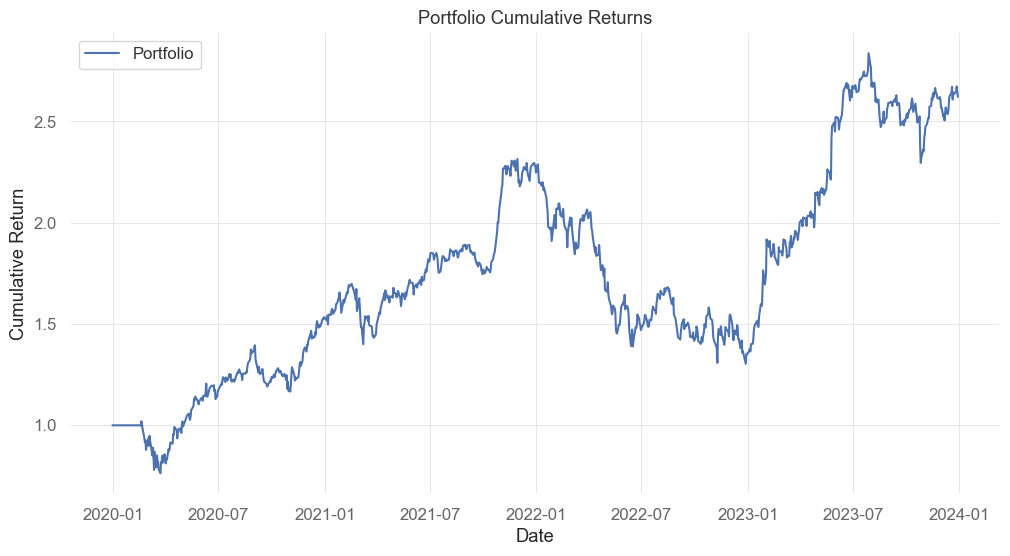

✅ Individual asset plotting successful

=== METHOD 3: Create ungrouped portfolio for detailed analysis ===
Ungrouped portfolio shape: (1007, 10)
✅ Ungrouped portfolio created successfully

💡 Key points:
- 'Grouped data' = portfolio treats all assets as one group
- group_by=True creates grouped data (good for strategy-level analysis)
- group_by=False creates individual asset data (good for detailed plotting)
- Use grouped for strategy metrics, ungrouped for asset-level analysis


In [58]:
# Fix "grouped data" plotting issues

# Method 1: Access group-level data explicitly
print("=== METHOD 1: Group-level plotting ===")
try:
    # For grouped portfolios, access the group data directly
    if hasattr(portfolio, 'get_group'):
        group_data = portfolio.get_group(0)  # Get first (and only) group
        group_data.plot().show()
    else:
        # Alternative: use cumulative returns which work with grouped data
        portfolio.cumulative_returns().vbt.plot().show()
    
    print("✅ Group-level plotting successful")
    
except Exception as e:
    print(f"Group plotting error: {e}")

print("\n=== METHOD 2: Individual asset plotting ===")
try:
    # Plot individual assets instead of grouped portfolio
    cumulative_returns = (1 + portfolio.returns()).cumprod()
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    if hasattr(cumulative_returns, 'values'):
        plt.plot(cumulative_returns.index, cumulative_returns.values, label='Portfolio')
    else:
        plt.plot(cumulative_returns.index, cumulative_returns, label='Portfolio')
    
    plt.title('Portfolio Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("✅ Individual asset plotting successful")
    
except Exception as e:
    print(f"Individual plotting error: {e}")

print("\n=== METHOD 3: Create ungrouped portfolio for detailed analysis ===")
try:
    # Create a separate ungrouped portfolio for detailed plotting
    portfolio_ungrouped = vbt.Portfolio.from_orders(
        data,
        target_weights,
        size_type="targetpercent",
        init_cash=10000,
        fees=0.001,
        freq="D",
        group_by=False,  # ← No grouping = individual asset data
        cash_sharing=False,  # ← Separate cash for each asset
        call_seq="auto",
    )
    
    print(f"Ungrouped portfolio shape: {portfolio_ungrouped.returns().shape}")
    print("✅ Ungrouped portfolio created successfully")
    
    # Now this should work for individual plots
    # portfolio_ungrouped.plot().show()  # Uncomment to test
    
except Exception as e:
    print(f"Ungrouped portfolio error: {e}")

print("\n💡 Key points:")
print("- 'Grouped data' = portfolio treats all assets as one group")
print("- group_by=True creates grouped data (good for strategy-level analysis)")  
print("- group_by=False creates individual asset data (good for detailed plotting)")
print("- Use grouped for strategy metrics, ungrouped for asset-level analysis")


In [59]:
portfolio.trades.plot_mae_returns().show()  # Loss analysis
portfolio.trades.plot_mfe_returns().show()  # Profit analysis

AttributeError: 'ExitTrades' object has no attribute 'plot_mae_returns'

In [ ]:
# Full HTML tearsheet report
portfolio.returns.vbt.returns.qs.html_report(
    benchmark=None, 
    title='Strategy Tearsheet',
    output='my_report.html'
)

# Basic metrics report
portfolio.returns.vbt.returns.qs.basic_report()

# Plots-only report  
# pf.returns.vbt.returns.qs.plots_report()

AttributeError: 'function' object has no attribute 'vbt'

In [ ]:
# Get portfolio returns
returns = portfolio.returns()

# Generate comprehensive HTML tearsheet report
qs.reports.html(
    returns,
    title='Strategy Tearsheet',
    output='strategy_tearsheet.html',
    download_filename='strategy_tearsheet.html'
)

print("HTML tearsheet saved as 'strategy_tearsheet.html'")

# Display basic metrics in the notebook
print("\n=== QUANTSTATS BASIC METRICS ===")
qs.reports.basic(returns)

# Show key metrics
print(f"\nAnnual Return: {qs.stats.cagr(returns):.2%}")
print(f"Volatility: {qs.stats.volatility(returns):.2%}")
print(f"Sharpe Ratio: {qs.stats.sharpe(returns):.2f}")
print(f"Max Drawdown: {qs.stats.max_drawdown(returns):.2%}")
print(f"Calmar Ratio: {qs.stats.calmar(returns):.2f}")


/Users/martin/git/playground/finance/backtesting/vectorbt_play/.venv/lib/python3.9/site-packages/quantstats/_plotting/core.py:294: FutureWarning:

Passing additional kwargs to DatetimeIndexResampler.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.



UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [ ]:
# Get portfolio returns
returns = portfolio.returns()

returns.vbt.returns.qs.r_squared(benchmark=returns)

returns.vbt.returns.qs.html_report(
    benchmark=None,
    title='Strategy Tearsheet',
    output='strategy_tearsheet.html',
    download_filename='strategy_tearsheet.html'
)

TypeError: Cannot compare dtypes datetime64[ns, UTC] and datetime64[ns]